# Capstone 2
## Supervised Learning


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ds_useful as ds
import requests

[My Useful Data Science Functions](https://github.com/cobyoram/python-for-data-scientists/blob/master/ds_useful.py)

In [5]:
def sort_nearest_locations(locations, latitude, longitude):
    locations['DISTANCE'] = np.sqrt((locations['LATITUDE'] - latitude)**2 + (locations['LONGITUDE'] - longitude)**2)
    locations = locations.sort_values(by='DISTANCE', ascending=True)
    return locations

def get_nearest_df(base_url, years, locations, print_log=False):
    for i in range(len(locations)):
        station_id = locations.iloc[i,0]
        try:
            data = pd.DataFrame()
            for year in years:
                current_url = '{}{}/{}'.format(base_url, year, station_id)
                if print_log:
                    print(current_url)
                df = pd.read_csv(current_url, na_values=[9999.9, 999.9, 99.99])
                data = pd.concat([data, df], axis=0)
            return data
        except:
            if print_log:
                print('Error: unable to find', station_id, 'data for year', year, 'searching next_nearest')
            continue

In [6]:
locations = pd.read_csv('station_locations.csv').drop('Unnamed: 0', axis=1)

In [8]:
LATITUDE = 78.299893
LONGITUDE = 14.931323

In [10]:
sorted_locations = sort_nearest_locations(locations, LATITUDE, LONGITUDE)

url = 'https://www.ncei.noaa.gov/data/global-summary-of-the-day/access/'
years = np.arange(1980, 2020, 1)

df = get_nearest_df(url, years, sorted_locations, print_log=True)

https://www.ncei.noaa.gov/data/global-summary-of-the-day/access/1980/01008099999.csv
https://www.ncei.noaa.gov/data/global-summary-of-the-day/access/1981/01008099999.csv
https://www.ncei.noaa.gov/data/global-summary-of-the-day/access/1982/01008099999.csv
https://www.ncei.noaa.gov/data/global-summary-of-the-day/access/1983/01008099999.csv
https://www.ncei.noaa.gov/data/global-summary-of-the-day/access/1984/01008099999.csv
https://www.ncei.noaa.gov/data/global-summary-of-the-day/access/1985/01008099999.csv
https://www.ncei.noaa.gov/data/global-summary-of-the-day/access/1986/01008099999.csv
https://www.ncei.noaa.gov/data/global-summary-of-the-day/access/1987/01008099999.csv
https://www.ncei.noaa.gov/data/global-summary-of-the-day/access/1988/01008099999.csv
https://www.ncei.noaa.gov/data/global-summary-of-the-day/access/1989/01008099999.csv
https://www.ncei.noaa.gov/data/global-summary-of-the-day/access/1990/01008099999.csv
https://www.ncei.noaa.gov/data/global-summary-of-the-day/access/1

In [15]:
df = df.rename(lambda x: x.lower(), axis=1)
df

,station,date,latitude,longitude,elevation,name,temp,temp_attributes,dewp,dewp_attributes,...,mxspd,gust,max,max_attributes,min,min_attributes,prcp,prcp_attributes,sndp,frshtt
0,1008099999,1980-01-01,78.246111,15.465556,26.82,"LONGYEAR, SV",-17.8,6,-24.1,6,...,6.0,NaN,-14.8,,-22.0,*,0.00,F,NaN,1000
1,1008099999,1980-01-02,78.246111,15.465556,26.82,"LONGYEAR, SV",-19.4,7,-24.8,7,...,5.1,NaN,-13.0,,-25.6,,0.01,F,NaN,1000
2,1008099999,1980-01-03,78.246111,15.465556,26.82,"LONGYEAR, SV",-14.8,8,-20.0,8,...,8.9,NaN,-5.8,,-23.8,*,0.01,F,NaN,1000
3,1008099999,1980-01-04,78.246111,15.465556,26.82,"LONGYEAR, SV",0.6,7,-4.0,7,...,5.1,NaN,6.8,*,-22.0,,0.00,E,NaN,1000
4,1008099999,1980-01-05,78.246111,15.465556,26.82,"LONGYEAR, SV",-9.7,7,-15.1,7,...,15.0,NaN,6.8,*,-20.2,*,0.02,F,NaN,1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,1008099999,2019-12-27,78.246111,15.465556,26.82,"LONGYEAR, SV",21.5,24,13.8,24,...,19.0,NaN,26.8,,13.5,*,0.02,E,NaN,1000
361,1008099999,2019-12-28,78.246111,15.465556,26.82,"LONGYEAR, SV",19.5,24,11.7,24,...,17.5,NaN,23.0,*,17.1,*,0.01,F,2.4,1000
362,1008099999,2019-12-29,78.246111,15.465556,26.82,"LONGYEAR, SV",16.1,24,6.3,24,...,15.5,NaN,19.6,,12.2,*,0.00,G,2.4,0
363,1008099999,2019-12-30,78.246111,15.465556,26.82,"LONGYEAR, SV",6.9,24,-3.3,24,...,18.1,NaN,12.9,*,-0.4,*,0.00,G,1.6,0


In [16]:
df.columns

Index(['station', 'date', 'latitude', 'longitude', 'elevation', 'name', 'temp',
       'temp_attributes', 'dewp', 'dewp_attributes', 'slp', 'slp_attributes',
       'stp', 'stp_attributes', 'visib', 'visib_attributes', 'wdsp',
       'wdsp_attributes', 'mxspd', 'gust', 'max', 'max_attributes', 'min',
       'min_attributes', 'prcp', 'prcp_attributes', 'sndp', 'frshtt'],
      dtype='object')

In [ ]:
standard_measurements = ['temp', '']

In [17]:
new_df = pd.read_csv('https://www.ncei.noaa.gov/data/normals-hourly/access/USW00094892.csv')

In [18]:
new_df

,STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,NAME,HLY-CLDH-NORMAL,HLY-CLDH-NORMAL_ATTRIBUTES,HLY-CLOD-PCTBKN,HLY-CLOD-PCTBKN_ATTRIBUTES,...,HLY-WIND-2NDPCT,HLY-WIND-2NDPCT_ATTRIBUTES,HLY-WIND-AVGSPD,HLY-WIND-AVGSPD_ATTRIBUTES,HLY-WIND-PCTCLM,HLY-WIND-PCTCLM_ATTRIBUTES,HLY-WIND-VCTDIR,HLY-WIND-VCTDIR_ATTRIBUTES,HLY-WIND-VCTSPD,HLY-WIND-VCTSPD_ATTRIBUTES
0,USW00094892,01-01T00:00:00,41.91444,-88.24639,229.8,"CHICAGO WEST CHICAGO DUPAGE AIRPORT, IL US",NaN,NaN,99,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USW00094892,01-01T01:00:00,41.91444,-88.24639,229.8,"CHICAGO WEST CHICAGO DUPAGE AIRPORT, IL US",0.0,S,72,C,...,170.0,C,101.0,C,65.0,C,263.0,C,36.0,C
2,USW00094892,01-01T02:00:00,41.91444,-88.24639,229.8,"CHICAGO WEST CHICAGO DUPAGE AIRPORT, IL US",0.0,S,56,C,...,173.0,C,99.0,C,73.0,C,262.0,C,35.0,C
3,USW00094892,01-01T03:00:00,41.91444,-88.24639,229.8,"CHICAGO WEST CHICAGO DUPAGE AIRPORT, IL US",0.0,S,67,C,...,173.0,C,99.0,C,59.0,C,265.0,C,34.0,C
4,USW00094892,01-01T04:00:00,41.91444,-88.24639,229.8,"CHICAGO WEST CHICAGO DUPAGE AIRPORT, IL US",0.0,S,70,C,...,167.0,C,98.0,C,75.0,C,262.0,C,34.0,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,USW00094892,12-31T19:00:00,41.91444,-88.24639,229.8,"CHICAGO WEST CHICAGO DUPAGE AIRPORT, IL US",0.0,S,96,S,...,196.0,S,108.0,S,31.0,S,256.0,S,35.0,S
8756,USW00094892,12-31T20:00:00,41.91444,-88.24639,229.8,"CHICAGO WEST CHICAGO DUPAGE AIRPORT, IL US",0.0,S,74,C,...,174.0,C,106.0,C,49.0,C,254.0,C,35.0,C
8757,USW00094892,12-31T21:00:00,41.91444,-88.24639,229.8,"CHICAGO WEST CHICAGO DUPAGE AIRPORT, IL US",0.0,S,74,C,...,169.0,C,106.0,C,33.0,C,258.0,C,35.0,C
8758,USW00094892,12-31T22:00:00,41.91444,-88.24639,229.8,"CHICAGO WEST CHICAGO DUPAGE AIRPORT, IL US",0.0,S,84,C,...,186.0,C,106.0,C,57.0,C,259.0,C,36.0,C


In [19]:
new_df.columns

Index(['STATION', 'DATE', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'NAME',
       'HLY-CLDH-NORMAL', 'HLY-CLDH-NORMAL_ATTRIBUTES', 'HLY-CLOD-PCTBKN',
       'HLY-CLOD-PCTBKN_ATTRIBUTES', 'HLY-CLOD-PCTCLR',
       'HLY-CLOD-PCTCLR_ATTRIBUTES', 'HLY-CLOD-PCTFEW',
       'HLY-CLOD-PCTFEW_ATTRIBUTES', 'HLY-CLOD-PCTOVC',
       'HLY-CLOD-PCTOVC_ATTRIBUTES', 'HLY-CLOD-PCTSCT',
       'HLY-CLOD-PCTSCT_ATTRIBUTES', 'HLY-DEWP-10PCTL',
       'HLY-DEWP-10PCTL_ATTRIBUTES', 'HLY-DEWP-90PCTL',
       'HLY-DEWP-90PCTL_ATTRIBUTES', 'HLY-DEWP-NORMAL',
       'HLY-DEWP-NORMAL_ATTRIBUTES', 'HLY-HIDX-NORMAL',
       'HLY-HIDX-NORMAL_ATTRIBUTES', 'HLY-HTDH-NORMAL',
       'HLY-HTDH-NORMAL_ATTRIBUTES', 'HLY-TEMP-10PCTL',
       'HLY-TEMP-10PCTL_ATTRIBUTES', 'HLY-TEMP-90PCTL',
       'HLY-TEMP-90PCTL_ATTRIBUTES', 'HLY-TEMP-NORMAL',
       'HLY-TEMP-NORMAL_ATTRIBUTES', 'HLY-WCHL-NORMAL',
       'HLY-WCHL-NORMAL_ATTRIBUTES', 'HLY-WIND-1STDIR',
       'HLY-WIND-1STDIR_ATTRIBUTES', 'HLY-WIND-1STPCT',
       'HLY-W

In [22]:
some_df = pd.read_csv('../capstone_1_proposal/energy_dataset.csv')

In [24]:
some_df.columns

Index(['time', 'generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil coal-derived gas', 'generation fossil gas',
       'generation fossil hard coal', 'generation fossil oil',
       'generation fossil oil shale', 'generation fossil peat',
       'generation geothermal', 'generation hydro pumped storage aggregated',
       'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation marine',
       'generation nuclear', 'generation other', 'generation other renewable',
       'generation solar', 'generation waste', 'generation wind offshore',
       'generation wind onshore', 'forecast solar day ahead',
       'forecast wind offshore eday ahead', 'forecast wind onshore day ahead',
       'total load forecast', 'total load actual', 'price day ahead',
       'price actual'],
      dtype='object')

In [26]:
missings = ds.missingness_summary(some_df, print_log=True)

generation hydro pumped storage aggregated     100.000000
forecast wind offshore eday ahead              100.000000
total load actual                                0.102669
generation marine                                0.054187
generation waste                                 0.054187
generation hydro pumped storage consumption      0.054187
generation hydro run-of-river and poundage       0.054187
generation fossil oil                            0.054187
generation biomass                               0.054187
generation wind offshore                         0.051335
generation wind onshore                          0.051335
generation solar                                 0.051335
generation fossil hard coal                      0.051335
generation other                                 0.051335
generation fossil gas                            0.051335
generation hydro water reservoir                 0.051335
generation fossil coal-derived gas               0.051335
generation fos

In [28]:
some_df.drop(missings.loc[missings == 100].index, axis=1, inplace=True)

In [31]:
some_df.interpolate(method='linear', axis=0, inplace=True, limit_direction='both')
some_df

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation solar,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,49.0,196.0,0.0,6378.0,17.0,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,50.0,195.0,0.0,5890.0,16.0,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,50.0,196.0,0.0,5461.0,8.0,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,50.0,191.0,0.0,5238.0,2.0,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,42.0,189.0,0.0,4935.0,9.0,4861.0,21785.0,20264.0,38.41,56.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,2018-12-31 19:00:00+01:00,297.0,0.0,0.0,7634.0,2628.0,178.0,0.0,0.0,0.0,...,85.0,277.0,0.0,3113.0,96.0,3253.0,30619.0,30653.0,68.85,77.02
35060,2018-12-31 20:00:00+01:00,296.0,0.0,0.0,7241.0,2566.0,174.0,0.0,0.0,0.0,...,33.0,280.0,0.0,3288.0,51.0,3353.0,29932.0,29735.0,68.40,76.16
35061,2018-12-31 21:00:00+01:00,292.0,0.0,0.0,7025.0,2422.0,168.0,0.0,0.0,0.0,...,31.0,286.0,0.0,3503.0,36.0,3404.0,27903.0,28071.0,66.88,74.30
35062,2018-12-31 22:00:00+01:00,293.0,0.0,0.0,6562.0,2293.0,163.0,0.0,0.0,0.0,...,31.0,287.0,0.0,3586.0,29.0,3273.0,25450.0,25801.0,63.93,69.89


In [35]:
some_df['time'] = some_df['time'].str.replace('\+[0-9][0-9]:[0-9][0-9]', '', regex=True)
some_df['time'] = pd.to_datetime(some_df['time'])
some_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 27 columns):
time                                           35064 non-null datetime64[ns]
generation biomass                             35064 non-null float64
generation fossil brown coal/lignite           35064 non-null float64
generation fossil coal-derived gas             35064 non-null float64
generation fossil gas                          35064 non-null float64
generation fossil hard coal                    35064 non-null float64
generation fossil oil                          35064 non-null float64
generation fossil oil shale                    35064 non-null float64
generation fossil peat                         35064 non-null float64
generation geothermal                          35064 non-null float64
generation hydro pumped storage consumption    35064 non-null float64
generation hydro run-of-river and poundage     35064 non-null float64
generation hydro water reservoir            

In [44]:
# Lets melt the dataframe down so we can make a pretty linegraph
no_graph_cols = [col for col in some_df.columns if 'price' in col or 'total' in col or 'forecast' in col]
print(no_graph_cols)
melted_df = some_df.drop(no_graph_cols, axis=1).melt(id_vars=['time'])
melted_df

['forecast solar day ahead', 'forecast wind onshore day ahead', 'total load forecast', 'total load actual', 'price day ahead', 'price actual']


,time,variable,value
0,2015-01-01 00:00:00,generation biomass,447.0
1,2015-01-01 01:00:00,generation biomass,449.0
2,2015-01-01 02:00:00,generation biomass,448.0
3,2015-01-01 03:00:00,generation biomass,438.0
4,2015-01-01 04:00:00,generation biomass,428.0
...,...,...,...
701275,2018-12-31 19:00:00,generation wind onshore,3113.0
701276,2018-12-31 20:00:00,generation wind onshore,3288.0
701277,2018-12-31 21:00:00,generation wind onshore,3503.0
701278,2018-12-31 22:00:00,generation wind onshore,3586.0


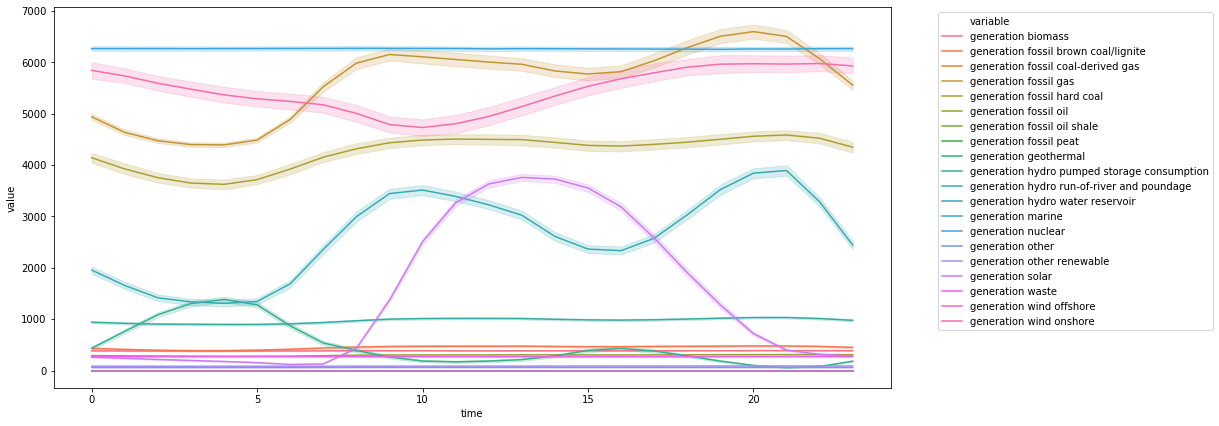

In [46]:
plt.figure(figsize=(15,7))
sns.lineplot(x=melted_df['time'].dt.hour, y='value', hue='variable', data=melted_df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

In [ ]:
def plot_scatter(df, col, x_col):
    sns.scatter(x=df[x_col], y=df[col])

ds.make_subplots(df, plot_scatter, ['date'])